In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
from sklearn.metrics import precision_score
from sklearn import metrics




In [ ]:
df=pd.read_csv('candy-data.csv')
df=df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard']]

In [8]:
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [9]:
df.drop('competitorname',axis=1,inplace=True)

In [10]:
df.head()

,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
trainingSet,testSet = train_test_split(df,test_size=0.2,random_state= 42)

In [13]:
train_df = trainingSet
test_df = testSet

In [14]:
x_train = train_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_train = train_df['chocolate']
x_test = test_df[['fruity','caramel','peanutyalmondy','nougat','crispedricewafer','hard','bar','pluribus','sugarpercent','pricepercent','winpercent']]
y_test = test_df['chocolate']

In [15]:
df.shape

(85, 12)

In [16]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((68, 11), (17, 11), (68,), (17,))

In [17]:
y_train.value_counts()

chocolate
0    39
1    29
Name: count, dtype: int64

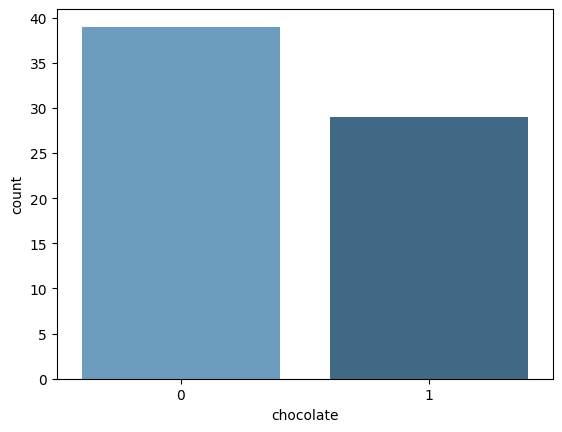

<Figure size 640x480 with 0 Axes>

In [23]:
sns.countplot(x="chocolate", data=train_df, palette='Blues_d', hue="chocolate", legend=False)
plt.show()
plt.savefig('count_plot')

In [22]:
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_pred = logreg.predict(x_test)

In [28]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[8, 1],
       [1, 7]])

Text(0.5, 427.9555555555555, 'Predicted label')

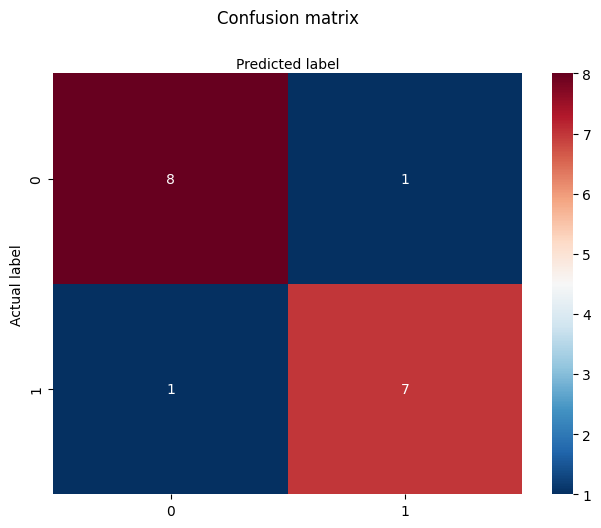

In [33]:
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
#create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot =True, cmap="RdBu_r",fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [38]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))


Accuracy: 0.8823529411764706
Precision: 0.875
Recall: 0.875
